In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sweet-spicy-north-or-south/indian-cuisine-2020-map.jpg
/kaggle/input/indian-food-101/indian_food.csv


In [2]:
import geopandas as gpd
import plotly.express as px
from plotly.offline import init_notebook_mode
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image

In [3]:
cuisine = pd.read_csv('/kaggle/input/indian-food-101/indian_food.csv')
cuisine


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [4]:
cuisine = pd.read_csv('../input/indian-food-101/indian_food.csv')
cuisine = cuisine.replace(-1,np.nan)
cuisine = cuisine.replace('-1',np.nan)

In [5]:
cuisine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            255 non-null    object 
 1   ingredients     255 non-null    object 
 2   diet            255 non-null    object 
 3   prep_time       225 non-null    float64
 4   cook_time       227 non-null    float64
 5   flavor_profile  226 non-null    object 
 6   course          255 non-null    object 
 7   state           231 non-null    object 
 8   region          241 non-null    object 
dtypes: float64(2), object(7)
memory usage: 18.1+ KB


In [6]:
cuisine.isnull().sum()

name               0
ingredients        0
diet               0
prep_time         30
cook_time         28
flavor_profile    29
course             0
state             24
region            14
dtype: int64

In [7]:
pie_df = cuisine.flavor_profile.value_counts().reset_index()
pie_df.columns = ['flavor_profile', 'count']
fig = px.pie(pie_df, values='count', names='flavor_profile', title='Sweet or Spicy?',
             color_discrete_sequence=['blue', 'light green'])
fig.show()

In [8]:
reg_df = cuisine.flavor_profile.value_counts().reset_index()
reg_df.columns = ['flavor_profile', 'prep_time']
reg_df = reg_df.sample(frac=1)
fig = px.bar(reg_df,x='flavor_profile',y='prep_time',title='Okay!variety in spicy food items is more, but it takes more time to get prepared! Are you ready to wait?',
             color_discrete_sequence=['purple'])
fig.show()

In [9]:
reg_df = cuisine.flavor_profile.value_counts().reset_index()
reg_df.columns = ['flavor_profile', 'cook_time']
reg_df = reg_df.sample(frac=1)
fig = px.bar(reg_df,x='flavor_profile',y='cook_time',title='It took more time to prepare, but wait! sweet dishes also take much time to get cooked, not more than spicy dishes though! ;)',
             color_discrete_sequence=['pink'])
fig.show()

In [10]:
reg_df = cuisine.course.value_counts().reset_index()
reg_df.columns = ['course', 'prep_time']
reg_df = reg_df.sample(frac=1)
fig = px.bar(reg_df,x='course',y='prep_time',title='Lets order main course, as it takes more time to get prepared! Choose your dessert also!',
             color_discrete_sequence=['purple'])
fig.show()

In [11]:
reg_df = cuisine.course.value_counts().reset_index()
reg_df.columns = ['course', 'cook_time']
reg_df = reg_df.sample(frac=1)
fig = px.bar(reg_df,x='course',y='cook_time',title='Snacks is here! Umm, main course may take some more time, and dessert too!',
             color_discrete_sequence=['pink'])
fig.show()

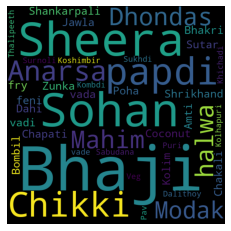

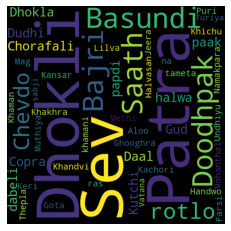

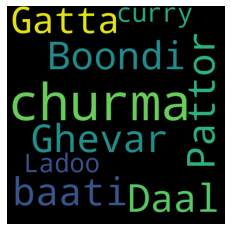

In [12]:
mh_cuisine  = cuisine[cuisine['state']=='Maharashtra'].reset_index()

name = []
for i in range(0,len(mh_cuisine)):
    text = mh_cuisine['name'][i].split(',')
    text = ','.join(text)
    name.append(text)
    text = ' '.join(name)

wordcloud = WordCloud(width = 500, height = 500, background_color ='black', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

g_cuisine  = cuisine[cuisine['state']=='Gujarat'].reset_index()

name = []
for i in range(0,len(g_cuisine)):
    text = g_cuisine['name'][i].split(',')
    text = ','.join(text)
    name.append(text)
    text = ' '.join(name)

wordcloud = WordCloud(width = 500, height = 500, background_color ='black', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

r_cuisine  = cuisine[cuisine['state']=='Rajasthan'].reset_index()

name = []
for i in range(0,len(r_cuisine)):
    text = r_cuisine['name'][i].split(',')
    text = ','.join(text)
    name.append(text)
    text = ' '.join(name)

wordcloud = WordCloud(width = 500, height = 500, background_color ='black', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()



In [13]:
print("Have you guessed the name of the state?")
print("Bhaji, sheera, modak,..? Maharshtra!")
print("Patra, Daal Dhokli, Undhiyu,..? Gujarat!")
print("Daal bati, churma, boondi,..? Rajsthan!")
print("So, let's see Ingridients used in West India!")

Have you guessed the name of the state?
Bhaji, sheera, modak,..? Maharshtra!
Patra, Daal Dhokli, Undhiyu,..? Gujarat!
Daal bati, churma, boondi,..? Rajsthan!
So, let's see Ingridients used in West India!


Gujarat's Daal Dhokli, Rajsthan's Daal bati and Maharshtra's Amti!


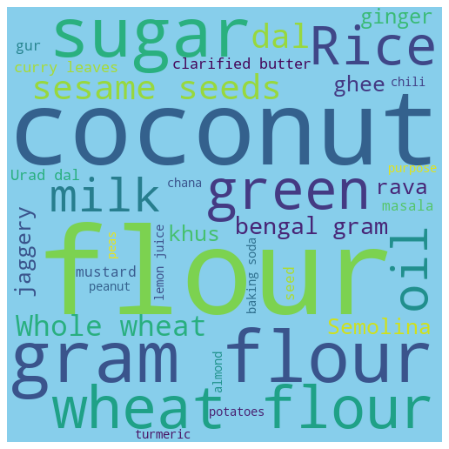

In [14]:
print("Gujarat's Daal Dhokli, Rajsthan's Daal bati and Maharshtra's Amti!")
west_cuisine  = cuisine[cuisine['region']=='West'].reset_index()

ingredients = []
for i in range(0,len(west_cuisine)):
    text = west_cuisine['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 500, height = 500, background_color ='skyblue', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (16,8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

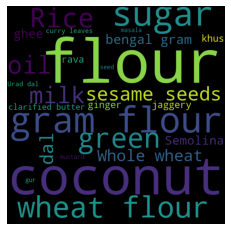

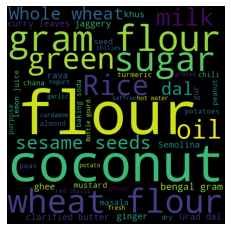

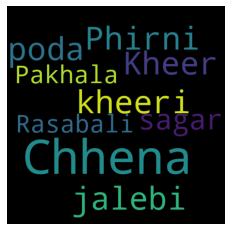

In [15]:
asam_cuisine  = cuisine[cuisine['state']=='Asam'].reset_index()

name = []
for i in range(0,len(asam_cuisine)):
    text = asam_cuisine['name'][i].split(',')
    text = ','.join(text)
    name.append(text)
    text = ' '.join(name)

wordcloud = WordCloud(width = 500, height = 500, background_color ='black', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

b_cuisine  = cuisine[cuisine['state']=='Bengal'].reset_index()

name = []
for i in range(0,len(b_cuisine)):
    text = b_cuisine['name'][i].split(',')
    text = ','.join(text)
    name.append(text)
    text = ' '.join(name)

wordcloud = WordCloud(width = 500, height = 500, background_color ='black', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

o_cuisine  = cuisine[cuisine['state']=='Odisha'].reset_index()

name = []
for i in range(0,len(o_cuisine)):
    text = o_cuisine['name'][i].split(',')
    text = ','.join(text)
    name.append(text)
    text = ' '.join(name)

wordcloud = WordCloud(width = 500, height = 500, background_color ='black', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()



Bengal's sweetness, Asam's spicy food and Odish's variety!


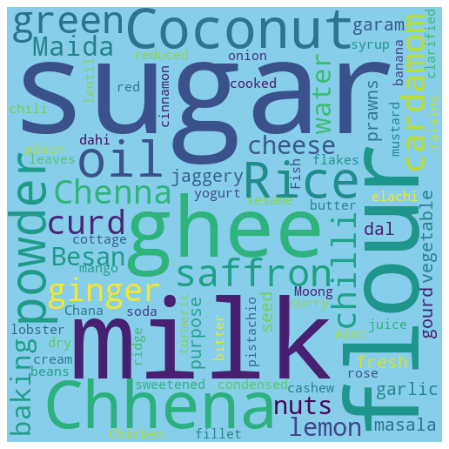

In [16]:
print("Bengal's sweetness, Asam's spicy food and Odish's variety!")
east_cuisine  = cuisine[cuisine['region']=='East'].reset_index()

ingredients = []
for i in range(0,len(east_cuisine)):
    text = east_cuisine['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 500, height = 500, background_color ='skyblue', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

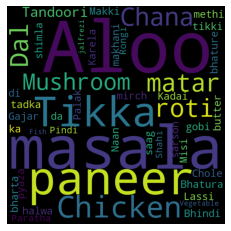

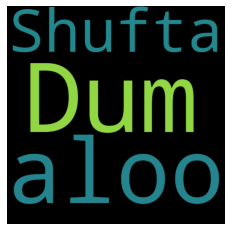

In [17]:
panjab_cuisine  = cuisine[cuisine['state']=='Punjab'].reset_index()

name = []
for i in range(0,len(panjab_cuisine)):
    text = panjab_cuisine['name'][i].split(',')
    text = ','.join(text)
    name.append(text)
    text = ' '.join(name)

wordcloud = WordCloud(width = 500, height = 500, background_color ='black', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

jk_cuisine  = cuisine[cuisine['state']=='Jammu & Kashmir'].reset_index()

name = []
for i in range(0,len(jk_cuisine)):
    text = jk_cuisine['name'][i].split(',')
    text = ','.join(text)
    name.append(text)
    text = ' '.join(name)

wordcloud = WordCloud(width = 500, height = 500, background_color ='black', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()


Aloo, paneer, cholue bhature....list goes on!


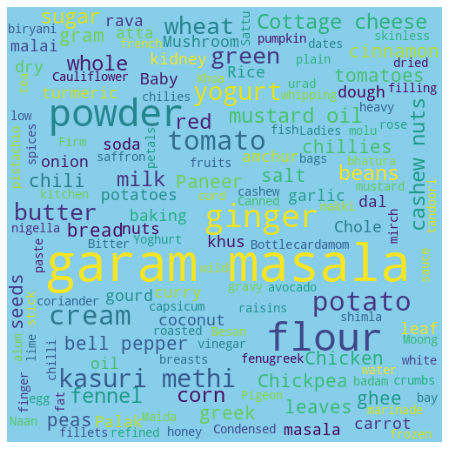

In [18]:
print("Aloo, paneer, cholue bhature....list goes on!")
north_cuisine  = cuisine[cuisine['region']=='North'].reset_index()

ingredients = []
for i in range(0,len(north_cuisine)):
    text = north_cuisine['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)

wordcloud = WordCloud(width = 500, height = 500, background_color ='skyblue', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

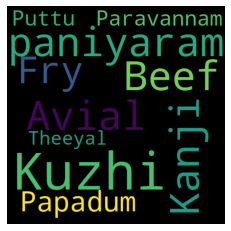

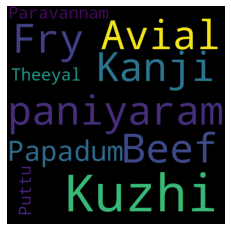

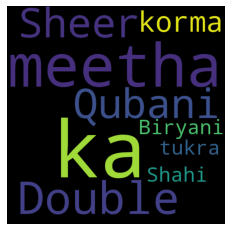

In [19]:
kr_cuisine  = cuisine[cuisine['state']=='Kerala'].reset_index()

name = []
for i in range(0,len(kr_cuisine)):
    text = kr_cuisine['name'][i].split(',')
    text = ','.join(text)
    name.append(text)
    text = ' '.join(name)

wordcloud = WordCloud(width = 500, height = 500, background_color ='black', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

t_cuisine  = cuisine[cuisine['state']=='Tamilnadu'].reset_index()

name = []
for i in range(0,len(t_cuisine)):
    text = t_cuisine['name'][i].split(',')
    text = ','.join(text)
    name.append(text)
    text = ' '.join(name)

wordcloud = WordCloud(width = 500, height = 500, background_color ='black', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

tg_cuisine  = cuisine[cuisine['state']=='Telangana'].reset_index()

name = []
for i in range(0,len(tg_cuisine)):
    text = tg_cuisine['name'][i].split(',')
    text = ','.join(text)
    name.append(text)
    text = ' '.join(name)

wordcloud = WordCloud(width = 500, height = 500, background_color ='black', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

South Indian sambhar with idli, dosa!


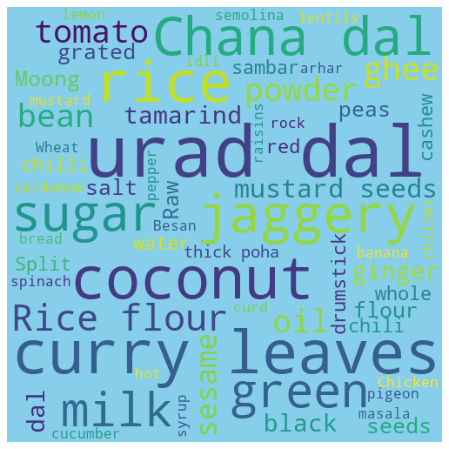

In [20]:
print("South Indian sambhar with idli, dosa!")
south_cuisine  = cuisine[cuisine['region']=='South'].reset_index()

ingredients = []
for i in range(0,len(south_cuisine)):
    text = south_cuisine['ingredients'][i].split(',')
    text = ','.join(text)
    ingredients.append(text)
    text = ' '.join(ingredients)
    
wordcloud = WordCloud(width = 500, height = 500, background_color ='skyblue', 
                min_font_size = 14).generate(text)                  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

In [21]:
ingredients = pd.Series(cuisine.ingredients.str.split(',').sum()).value_counts()
ingredients = ingredients[ingredients>12]

px.bar(ingredients, y=ingredients.values, x=ingredients.index, color=ingredients.values, title= 'Indian cuisine is nothing without these top ingredients!', 
    labels={
    'index': 'Igredient',
    'y': 'Count'
        })

In [22]:
ingredients = pd.Series(cuisine.ingredients.str.split(',').sum()).value_counts()
ingredients = ingredients[ingredients<4]

px.bar(ingredients, y=ingredients.values, x=ingredients.index, color=ingredients.values, title= 'Though these ingredients are used less, they help in making the food more tasty and yummy!', 
    labels={
    'index': 'Igredient',
    'y': 'Count'
        })